<a href="https://colab.research.google.com/github/SamiraHabib/Coursera_Capstone/blob/main/Coursera_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera Capstone #

## Modelo de negócio: ##

### Verificar o melhor local onde se encontram o maior número de escolas e o menor número de papelarias. A finalidade seria montar uma papelaria num lugar propício que possa atingir um maior público que utiliza esses serviços. ###

# Importando as bibliotecas #

In [243]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


# Definição das credenciais e version do Foursquare #

In [244]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


# Endereço do local escolhido #

In [245]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


# Localização #

In [246]:
#Localidade exemplo, mudar
latitude = -22.912161949999998 
longitude = -43.23117510590559

# Define URL #

In [247]:
search_query = 'colégio'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

colégio .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=colégio&radius=2000&limit=50'

# Envia uma solicitação GET e examina os resultados #

In [248]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60849cc180fffa310de4605c'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'primary': True,
      'shortName': 'School'}],
    'hasPerk': False,
    'id': '4dc1528422713750ba79c2ad',
    'location': {'address': 'R. S. Francisco Xavier, 267',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 660,
     'formattedAddress': ['R. S. Francisco Xavier, 267',
      'Rio de Janeiro, RJ',
      '20550-010',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.916797220457074,
       'lng': -43.227150214751354}],
     'lat': -22.916797220457074,
     'lng': -43.227150214751354,
     'postalCode': '20550-010',
     'state': 'RJ'},
    'name': 'Colégio Militar do Rio de Janeiro (CMRJ)',
    'referra

## Pegando a parte relevante do JSON e transformando em um dataframe (pandas) ##

In [249]:
#transformando em dataframe
venues = results['response']['venues']
df_school = json_normalize(venues)
df_school.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4dc1528422713750ba79c2ad,Colégio Militar do Rio de Janeiro (CMRJ),"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619303617,False,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN
1,4dbfe92c4b2221ec2d640bac,Colégio Batista,[],v-1619303617,False,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã
2,512b53c1e4b0fd3b1159b204,Colégio Ressurreição,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619303617,False,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN
3,5071a03ce4b0e1b65ea15489,Colégio Pedro II,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619303617,False,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II
4,4ea5556577c8d0ce5f233bbb,Colégio Colégio Nossa Senhora de Lourdes (NSL),"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619303617,False,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN


# Define a informação de interesse e filtra o dataframe #

In [250]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_school.columns if col.startswith('location.')] + ['id']
df_school_filtered = df_school.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_school_filtered['categories'] = df_school_filtered.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_school_filtered.columns = [column.split('.')[-1] for column in df_school_filtered.columns]

df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN,4ea5556577c8d0ce5f233bbb


# Avaliação dos dados: #

In [251]:
df_school_filtered.dtypes

name                 object
categories           object
address              object
lat                 float64
lng                 float64
labeledLatLngs       object
distance              int64
postalCode           object
cc                   object
city                 object
state                object
country              object
formattedAddress     object
crossStreet          object
id                   object
dtype: object

In [252]:
df_school_filtered.describe()

,lat,lng,distance
count,50.000000,50.000000,50.000000
mean,-22.917099,-43.230347,1189.800000
std,0.006465,0.008907,470.994259
min,-22.931675,-43.246514,221.000000
25%,-22.921262,-43.238463,807.500000
50%,-22.916570,-43.230589,1236.500000
75%,-22.914210,-43.222731,1561.000000
max,-22.899421,-43.214707,2213.000000


In [253]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,20550-201,BR,Rio de Janeiro,RJ,Brasil,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",NaN,4ea5556577c8d0ce5f233bbb


# Número de nulos das colunas #

In [254]:
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column crossStreet :", df_school_filtered['crossStreet'].isnull().sum())

Number of NaN values for the column city : 14
Number of NaN values for the column state : 14
Number of NaN values for the column crossStreet : 45


In [255]:
df_school_filtered['state'].replace(np.nan,"RJ", inplace=True)

In [256]:
df_school_filtered['city'].replace(np.nan,"Rio de Janeiro", inplace=True)

In [257]:
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())

Number of NaN values for the column state : 0
Number of NaN values for the column city : 0


In [258]:
df_school_filtered['categories'].value_counts()

School                             13
High School                        10
Private School                      7
Student Center                      3
College Classroom                   3
College Academic Building           2
Community College                   2
College Administrative Building     2
Daycare                             1
Church                              1
General College & University        1
University                          1
Elementary School                   1
Religious School                    1
Name: categories, dtype: int64

In [259]:
df_school_filtered.isnull().sum()

name                 0
categories           2
address             14
lat                  0
lng                  0
labeledLatLngs       0
distance             0
postalCode          27
cc                   0
city                 0
state                0
country              0
formattedAddress     0
crossStreet         45
id                   0
dtype: int64

# Dropando uma coluna #

In [260]:
df_school_filtered.drop('crossStreet', axis=1, inplace=True)
df_school_filtered.drop('postalCode', axis=1, inplace=True)
df_school_filtered.drop('cc', axis=1, inplace=True)
df_school_filtered.drop('city', axis=1, inplace=True)
df_school_filtered.drop('state', axis=1, inplace=True)
df_school_filtered.drop('country', axis=1, inplace=True)

In [261]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",4ea5556577c8d0ce5f233bbb


In [262]:
df_school_filtered['name'].count()

50

In [263]:
df_school_filtered=df_school_filtered.assign(id_global=1)
print(df_school_filtered)

                                              name  ... id_global
0         Colégio Militar do Rio de Janeiro (CMRJ)  ...         1
1                                  Colégio Batista  ...         1
2                             Colégio Ressurreição  ...         1
3                                 Colégio Pedro II  ...         1
4   Colégio Colégio Nossa Senhora de Lourdes (NSL)  ...         1
5                       Colégio Pinheiro Guimarães  ...         1
6                                       Colégio Qi  ...         1
7                            Pensi Colégio e Curso  ...         1
8                               Colégio e Curso pH  ...         1
9                            Pensi Colégio e Curso  ...         1
10                                Colégio Pedro II  ...         1
11                           Colégio Curso Martins  ...         1
12              Colégio Curso Intellectus - Tijuca  ...         1
13         Colégio Carolinna Russo - Sala de vídeo  ...         1
14     CAR

# Nome e categorias dos dados #

In [264]:
df_school_filtered.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [265]:
df_school_filtered.categories

0                              School
1                                None
2                              School
3                              School
4                      Private School
5                              School
6                      Private School
7                      Private School
8                         High School
9                      Private School
10                        High School
11                             School
12                        High School
13                  College Classroom
14                     Private School
15                             School
16                   Religious School
17                        High School
18       General College & University
19                        High School
20                  Community College
21                     Student Center
22                        High School
23                             Church
24                        High School
25                             School
26          

In [266]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad,1
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac,1
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204,1
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489,1
4,Colégio Colégio Nossa Senhora de Lourdes (NSL),Private School,"R. Oito de Dezembro, 328",-22.909630,-43.240261,"[{'label': 'display', 'lat': -22.9096297441251...",973,"[R. Oito de Dezembro, 328, Rio de Janeiro, RJ,...",4ea5556577c8d0ce5f233bbb,1


# Visualizar escolas no mapa ao redor da localização anteriormente citada #

In [267]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # gerar mapa centrado no entorno do RJ

# Circulo vermelho no centro
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Escolas em azul ao entorno
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
       # popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Novo dataframe para fazer um merge #

In [268]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


In [269]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


In [270]:
#Localidade exemplo, mudar
latitude = -22.912161949999998
longitude = -43.23117510590559

In [271]:
search_query = 'papelaria'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

papelaria .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=papelaria&radius=2000&limit=50'

In [272]:
import requests
negocios = requests.get(url).json()
negocios

{'meta': {'code': 200, 'requestId': '60849cdde56eec0c3f73eb4b'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/papergoods_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d121951735',
      'name': 'Paper / Office Supplies Store',
      'pluralName': 'Paper / Office Supplies Stores',
      'primary': True,
      'shortName': 'Office Supplies'}],
    'hasPerk': False,
    'id': '4e946c658b81ef41a94b7377',
    'location': {'address': 'Rua São Francisco Xavier',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 427,
     'formattedAddress': ['Rua São Francisco Xavier',
      'Rio de Janeiro, RJ',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.91596947304269,
       'lng': -43.23062765107665}],
     'lat': -22.91596947304269,
     'lng': -43.23062765107665,
     'state': 'RJ'},
    'name': 'Papelaria Porto Seguro',
    'referralId': 'v-1619303645'},


In [273]:
#transformando em dataframe
venues = negocios['response']['venues']
df_paper = json_normalize(venues)
df_paper.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,venuePage.id
0,4e946c658b81ef41a94b7377,Papelaria Porto Seguro,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",v-1619303645,False,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,NaN
1,4f6258a3e4b0832f00d7d3cd,Papelaria Yunes,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1619303645,False,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
2,53c547c1498ef1a0284198aa,papelaria raposo,"[{'id': '52f2ab2ebcbc57f1066b8b1e', 'name': 'L...",v-1619303645,False,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
3,549da21b498e520a4e30b6b6,Papelaria Papel Moderno,"[{'id': '52f2ab2ebcbc57f1066b8b21', 'name': 'S...",v-1619303645,False,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,NaN
4,4ea69f80cc219396a47722c6,Papelaria Risco e Rabisco,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",v-1619303645,False,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,BR,Rio de Janeiro,RJ,Brasil,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",NaN,NaN,NaN


In [274]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_paper.columns if col.startswith('location.')] + ['id']
df_paper_filtro = df_paper.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_paper_filtro['categories'] = df_paper_filtro.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_paper_filtro.columns = [column.split('.')[-1] for column in df_paper_filtro.columns]

df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,549da21b498e520a4e30b6b6
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,BR,Rio de Janeiro,RJ,Brasil,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",NaN,NaN,4ea69f80cc219396a47722c6


In [275]:
df_paper_filtro.isnull().sum()

name                 0
categories           0
address             13
lat                  0
lng                  0
labeledLatLngs       0
distance             0
cc                   0
city                15
state               15
country              0
formattedAddress     0
crossStreet         30
postalCode          31
id                   0
dtype: int64

# Dropando colunas: #

In [276]:
df_paper_filtro.drop('crossStreet', axis=1, inplace=True)
df_paper_filtro.drop('cc', axis=1, inplace=True)
df_paper_filtro.drop('city', axis=1, inplace=True)
df_paper_filtro.drop('state', axis=1, inplace=True)
df_paper_filtro.drop('country', axis=1, inplace=True)
df_paper_filtro.drop('postalCode', axis=1, inplace=True)

In [277]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6


In [278]:
df_paper_filtro=df_paper_filtro.assign(id_global=0)
print(df_paper_filtro)

                                  name  ... id_global
0               Papelaria Porto Seguro  ...         0
1                      Papelaria Yunes  ...         0
2                     papelaria raposo  ...         0
3              Papelaria Papel Moderno  ...         0
4            Papelaria Risco e Rabisco  ...         0
5              Papelaria Santo Antonio  ...         0
6                       Papelaria Lord  ...         0
7                 Papelaria Saens Pena  ...         0
8                      Papelaria Gyrus  ...         0
9                       Papelaria Magu  ...         0
10                      Papelaria Magu  ...         0
11               Papelaria e Bazar 375  ...         0
12                       Papelaria 375  ...         0
13                  Papelaria Alvorada  ...         0
14             Dassis Café e Papelaria  ...         0
15                     Mille Papelaria  ...         0
16                 Papelaria Vila Real  ...         0
17                 Papelaria

In [279]:
df_paper_filtro.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [280]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6,0


# Novo  dataframe (juntando os dataframes) # 

In [281]:
df_new = df_paper_filtro.append(df_school_filtered)

In [282]:
df_new.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6,0


In [283]:
df_new.drop('address', axis=1, inplace=True)
df_new.drop('labeledLatLngs', axis=1, inplace=True)
df_new.drop('formattedAddress', axis=1, inplace=True)

In [284]:
df_new.head()

,name,categories,lat,lng,distance,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,-22.914617,-43.219935,1184,4ea69f80cc219396a47722c6,0


In [285]:
df_new.tail()

,name,categories,lat,lng,distance,id,id_global
45,Colégio Ícaro.,High School,-22.925388,-43.232258,1476,5204e05a498e64a5b96d47ce,1
46,Colégio Estadual Affonso Penna,Student Center,-22.924114,-43.241054,1672,52f005b4498e07bc50005368,1
47,Colégio Elza Campos,Private School,-22.925436,-43.235918,1555,4e0b72c26284a62b5bc18559,1
48,Colégio Wakigawa,School,-22.917812,-43.245822,1628,4e4c0f70a8097d9c84c3e987,1
49,Colégio Miguel Couto - Unidade Tijuca,Student Center,-22.916360,-43.218606,1370,4d6ef34f35993704e48e069d,1


In [286]:
df_new.shape

(87, 7)

# Visualizar as escolas e papelarias na redondeza do centro #

In [287]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # gerar mapa centrado no entorno do RJ

# Circulo vermelho no centro
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Escolas em azul ao entorno
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Papelarias em azul ao entorno
for lat, lng, label in zip(df_paper_filtro.lat, df_paper_filtro.lng, df_paper_filtro.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Parte de análise

In [288]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [289]:
#Filtrar só lat e long 
df_filt = df_new.loc[:,['lat','lng']]
df_filt.head()

,lat,lng
0,-22.915969,-43.230628
1,-22.912098,-43.236651
2,-22.919445,-43.234497
3,-22.922829,-43.231915
4,-22.914617,-43.219935


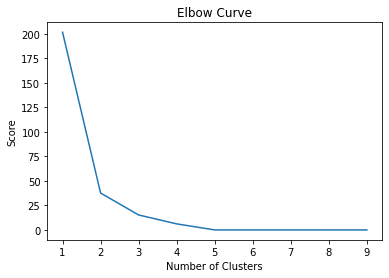

In [290]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_filt[['lat']]
X_axis = df_filt[['lng']]
score = [kmeans[i].fit(property_clustering).inertia_ for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [291]:
from sklearn.metrics import silhouette_score
silh_df = property_clustering
for i in range(2,5):
  kmeans = KMeans(n_clusters=i).fit(silh_df)
  labels_ = kmeans.labels_
  coef = silhouette_score(silh_df,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.7159518424439199
N_cluster: 3, score: 0.7677929602619706
N_cluster: 4, score: 0.8479780146350717


In [292]:
#Descobrir o K do K-means (Métricas do cotovelo e silhueta)

k=5
property_clustering = df_filt
kmeans = KMeans(n_clusters = k,random_state=0).fit(property_clustering)
kmeans.labels_
df_filt.insert(0, 'Cluster Labels', kmeans.labels_)


In [293]:
df_filt

,Cluster Labels,lat,lng
0,4,-22.915969,-43.230628
1,3,-22.912098,-43.236651
2,4,-22.919445,-43.234497
3,1,-22.922829,-43.231915
4,0,-22.914617,-43.219935
...,...,...,...
45,1,-22.925388,-43.232258
46,1,-22.924114,-43.241054
47,1,-22.925436,-43.235918
48,3,-22.917812,-43.245822


In [294]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[-22.915969, -43.230628], zoom_start=11)
kclusters = 5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_filt['lat'], df_filt['lng'], df_filt['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [295]:
df_new.insert(0, 'Cluster Labels', kmeans.labels_)

In [296]:
df_new.head()

,Cluster Labels,name,categories,lat,lng,distance,id,id_global
0,4,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,3,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,4,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,1,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,0,Papelaria Risco e Rabisco,Paper / Office Supplies Store,-22.914617,-43.219935,1184,4ea69f80cc219396a47722c6,0


In [297]:
df_new.groupby(["Cluster Labels", "id_global"])["id_global"].count()

Cluster Labels  id_global
0               0             9
                1            14
1               0            10
                1             9
2               0             7
                1             3
3               0             6
                1            10
4               0             5
                1            14
Name: id_global, dtype: int64

In [ ]:
#Rodar o K -means com o K escolhido 

In [ ]:
#inserir no dataframe original com os labels identificados no k-means

In [ ]:
#Análise pessoal (Contagem de escola por papelaria)
df.groupby(['Cluster Labels'])["coluna1"].count()
#coluna id global 